# Prediccion de Ventas en una Serie de Tiempo

## Forecasting in Time Series

Objetivo: Predecir un año de Ventas dados 6 años de datos (Periodicidad Mensual), aplicando conceptos de Series de Tiempo y algoritmos de forecasting en Aprendizaje No Supervisado

## Pasos:
### 0. Preparacion Hardware-Software
Requerimientos:
Python 3.6, Anaconda, Keras, Tensorflow, Scikit Learn, Scipy.

##### Comandos para instalar desde un Anaconda Prompt:
`conda create -n prediccionventas python=3.6 numpy scipy matplotlib spyder pandas
activate prediccionventas `
#computador sin gpu

`pip install --ignore-installed --upgrade tensorflow`
#computador GPU

`pip install --ignore-installed --upgrade tensorflow-gpu`
`conda install mkl-service m2w64-toolchain`
`pip install pydot keras`
> Si existe problemas por las versiones de las librerias, se recomienda importar el ambiente Conda del repositorio, el cual tiene los requerimientos configurados https://github.com/FreddieAbad/PrediccionAUCORP/tree/master/Entrega/Ambiente%20Conda

### 1. Obtencion de datos
No Aplica, los datos fueron provistos. 
### 2. Preparar los datos
Los atributos de la data corresponden a un total de 16 atributos, correspondientes a fechas, ventas, y variaciones estadísticas útiles para el fin de este proyecto.


In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

In [3]:
# cargamos el conjunto de datos
dataframe = read_csv('base_datos_ventas2.csv', sep=';')
dataset = dataframe.columns
print(dataset)

Index(['mes de analisis', 'Año', 'CATEGORIA', 'CANTIDAD_CLASIF_A',
       'ventas_totales_Veh_livianos', 'Tasa de inflación (mensual)',
       'Población Económicamente Activa (Nacional)',
       'Exportaciones totales (USD)',
       'PRODUCTO INTERNO BRUTO (PIB) TRIMESTRAL (MILES DE DOL)',
       'Balanza comercial total (millones de usd)',
       ' Valor Unitario del petroleo Promedio (eje der.) ',
       'EXPORTACIONES PETROLERAS (miles de USD) FOB (der)',
       'Import. CIF MILLONES USD', 'Exp. no petroleras MILLONES USD',
       'IMPORTACIONES Petroleras', 'IMPORTACIONES No Petroleras'],
      dtype='object')


Para seguir el proceso, se necesita entender los atributos y sus variaciones, por tanto se muestra a continuacion las graficas de los atributos en los cuales el negocio tiene una afeccion directa (CANTIDAD_CLASIF_A, Ventas de vehiculos livianos, Tasa Inflacion). Los demás atributos no, ya que no dependen directamente del negocio, sino del variables que dicta la situacion del pais.

#### Gráficas de cada atributo a travez del tiempo

##### Se debe reducir la dimensionalidad de los datos, evitando atributos innecesarios
El atributo Categoria no muestra valores influyentes en nuestra data, se mantiene el valor "A", si el modelo a entrenar toma en cuenta este atributo, se malgastarian recursos. El atributo Mes y Año se unen en un solo atributo, ya que al ser una serie de tiempo, estos dos fijan los demas valores a un solo valor en el tiempo.

##### Estandarización 
Refiere al desplazamiento de la distribución de cada atributo para tener una media de cero y una desviación estándar de uno (varianza unitaria).Es útil estandarizar atributos para un modelo que se basa en la distribución de atributos como los procesos gaussianos.
##### Normalización 
Refiere a reescalar atributos numéricos de valor real en el rango 0 y 1. Es útil escalar los atributos de entrada para un modelo que se basa en la magnitud de los valores, como las medidas de distancia utilizadas en los vecinos k más cercanos y en la preparación de coeficientes de regresión.

### > Los datos estan limpios, se puede proceder con los modelos de entrenamiento
### 3. Elegir el modelo
Al ser un problema de prediccion, se puede operar mediante varios algoritmos, sin embargo, uno de los requerimientos fue el realizarlo mediante un **Perceptron Multicapa (MLP)**.
Si bien, es posible realizarlo por una MLP, los errores usualmente suelen ser grandes, por tal se procedera a realizar 3 casos de estudio con 3, 5, 11 capas intermedias.
Las series de tiempo suelen tener mejores resultados con otro tipo de algoritmos, tales como los **LSTM (Long short-term memory)**, **RNN(Recurrent Neural Network)** . 
Se realizara tambien la prediccion con estos algoritmos, y finalmente se procedera a contrastar los resultados, para conocer cual fue el mejor método.

### 4. Desarrollo Modelos
Prediccion. Resultados:
##### Caso 1
Configuracion: Learning Rate 0.3 Epocas 20 Hidden Layers 3

![RESULT1.png](https://raw.githubusercontent.com/FreddieAbad/PrediccionAUCORP/master/ForecastWEKA/RESULT3.png?token=AJGK4NMNIC5WTJ5LGDDTBTS5OD4PS)
      

| Mes | Prediccion CANTIDAD_CLASIF_A |
| :-------------: | :-------------: |
| Enero 2019 | 19539.9719 |
| Febrero 2019 | 16205.9172 |
| Marzo 2019 | 3774.9766 |
| Abril 2019 | 21806.4895 |
| Mayo 2019 | 33265.9147 |
| Junio 2019 | 26336.9169 |
| Julio 2019 | 23226.3605 |
| Agosto 2019 | 29075.6198 |
| Septiembre 2019 | 39265.0998 |
| Octubre 2019 | 38623.6279 |
| Noviembre 2019 | 24892.4676 |
| Diciembre 2019 | 9921.7544 |         

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

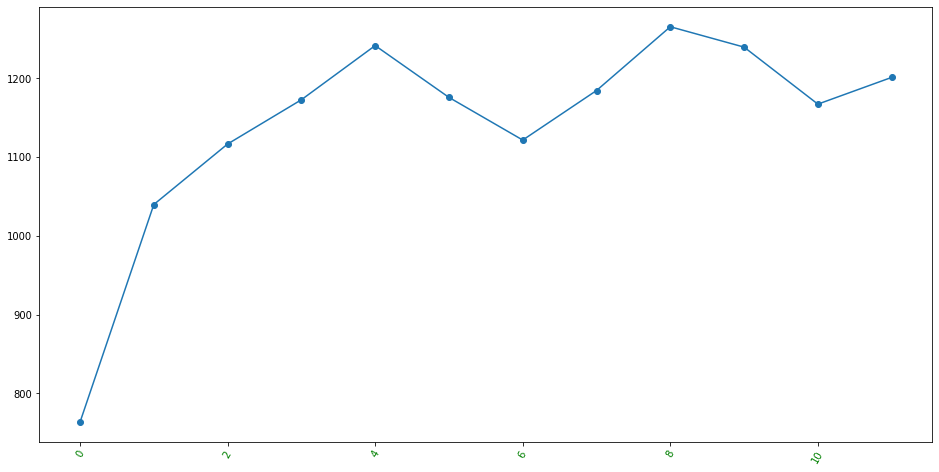

In [45]:
### Error
#meses=["Enero 2019","Febrero 2019","Marzo 2019","Abril 2019","Mayo 2019","Junio 2019","Julio 2019","Agosto 2019","Septiembre 2019","Octubre 2019","Noviembre 2019","Diciembre 2019"] 
mae=[763.4624,1039.8887, 1116.745,1172.9777,1241.7909,1175.9647, 1121.783,1184.7128,1265.7152,  1239.83,1167.4088,1201.3861]
figure(figsize=(16,8))
plt.plot(mae, "-o")
plt.xticks(fontsize=10, color = 'g', rotation = 60) 


##### Caso 2
Configuracion: Learning Rate 0.1 Epocas 20 Hidden Layers 20


![RESULT3.png](https://raw.githubusercontent.com/FreddieAbad/PrediccionAUCORP/master/ForecastWEKA/RESULT2.png?token=AJGK4NIZ6M7Y6XYQPPITIVC5OD35Y)


| Mes | Prediccion CANTIDAD_CLASIF_A |
| :-------------: | :-------------: |
| Enero 2019 | 16698.862 |
| Febrero 2019 | 19353.6774 |
| Marzo 2019 | 14024.0933 |
| Abril 2019 | 22657.4798 |
| Mayo 2019 | 23203.0621 |
| Junio 2019 | 16955.6281 |
| Julio 2019 | 18131.2674 |
| Agosto 2019 | 16285.8306 |
| Septiembre 2019 | 15794.0808 |
| Octubre 2019 | 11088.6973 |
| Noviembre 2019 | 12406.8213 |
| Diciembre 2019 | 10055.6109 |  

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

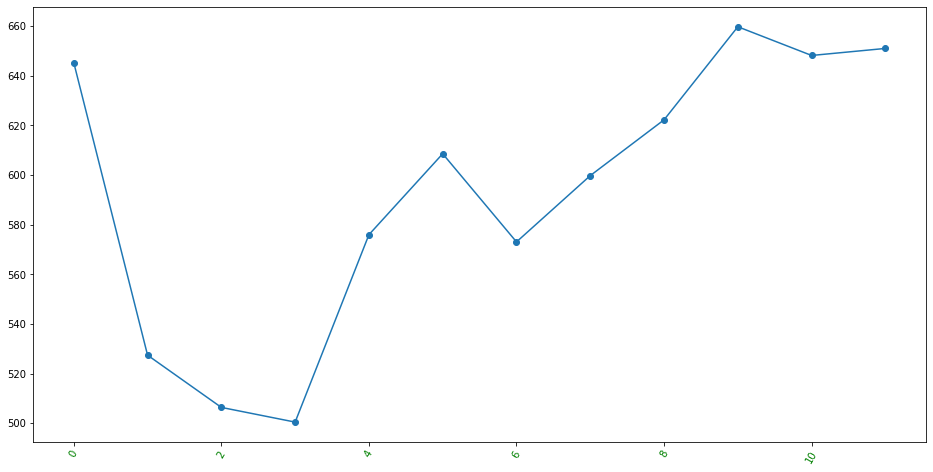

In [44]:
mae=[645.2398,527.4249,506.3839,500.4671,575.9494,608.5537,573.0385,599.7472,622.2249,659.7058,648.1423,650.9735]
figure(figsize=(16,8))
plt.plot( mae, "-o")
plt.xticks(fontsize=10, color = 'g', rotation = 60) 

Se evidencia errores inapropiados.